In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
color_pal = [x['color'] for x in plt.rcParams['axes.prop_cycle']]

In [ ]:
train_identity = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Essay /train_identity.csv")
train_transaction = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Essay /train_transaction.csv")
# train_identity = pd.read_csv("/content/drive/MyDrive/Essay/train_identity.csv")
# train_transaction = pd.read_csv("/content/drive/MyDrive/Essay/train_transaction (3).csv")
# train_identity = pd.read_csv('/content/drive/MyDrive/train_identity.csv')
# train_transaction = pd.read_csv('/content/drive/MyDrive/train_transaction.csv')
df = pd.merge(train_transaction, train_identity, on = "TransactionID", how = "left")

In [ ]:
def ploting_cnt_amt(df, col, lim=2000):
    tmp = pd.crosstab(df[col], df['isFraud'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
    total = len(df)
    
    plt.figure(figsize=(16,14))    
    plt.suptitle(f'{col} Distributions ', fontsize=24)
    
    plt.subplot(211)
    g = sns.countplot( x=col,  data=df, order=list(tmp[col].values))
    gt = g.twinx()
    gt = sns.pointplot(x=col, y='Fraud', data=tmp, order=list(tmp[col].values),
                       color='black', legend=False, )
    gt.set_ylim(0,tmp['Fraud'].max()*1.1)
    gt.set_ylabel("%Fraud Transactions", fontsize=16)
    g.set_title(f"Most Frequent {col} values and % Fraud Transactions", fontsize=20)
    g.set_xlabel(f"{col} Category Names", fontsize=16)
    g.set_ylabel("Count", fontsize=17)
    g.set_xticklabels(g.get_xticklabels(),rotation=45)
    sizes = []
    for p in g.patches:
        height = p.get_height()
        sizes.append(height)
        g.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center",fontsize=12) 
        
    g.set_ylim(0,max(sizes)*1.15)
    plt.show()


def percent_null(data):
  total = data.isnull().sum()
  count = len(data)
  percent = (total/count)*100
  percent = pd.DataFrame(percent,columns=['percent'])
  return percent

def descrip_series(df, series):
  a = df[series].value_counts()
  a = pd.DataFrame(data = a)
  a['percent_in_column'] = (a[series]/ df[series].count())*100
  return a


# 1.Thời gian xảy ra nhiều fraud nhất ?




**TransactionDT**

TransactionDT : is a timedelta from a given reference datetime (not an actual timestamp).

TransactionDT is one of the features that can cause problems.

It seems as if there is a time difference between testing and train operations.

In [ ]:
train_transaction['time'] = round(train_transaction['TransactionDT']/(60*60*24),1)
# data is calculated for 183 days and in seconds

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


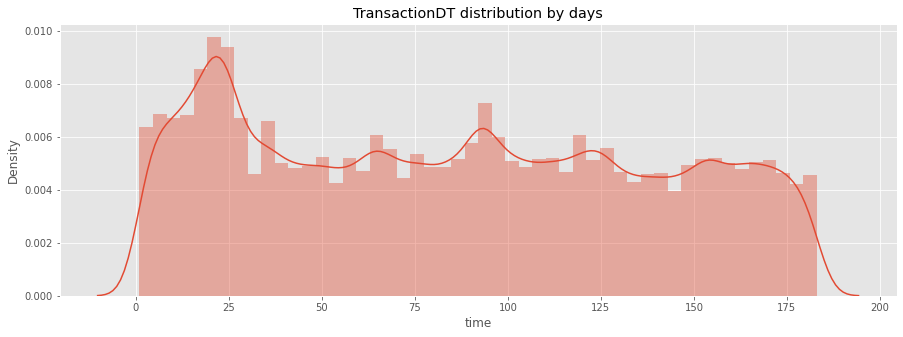

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(train_transaction["time"])
plt.title('TransactionDT distribution by days')
plt.show()


Distribution graph starting from day 1 to day 183, the data is concentrated in the range of days (23,25)

,0,1
isFraud,0.96501,0.03499


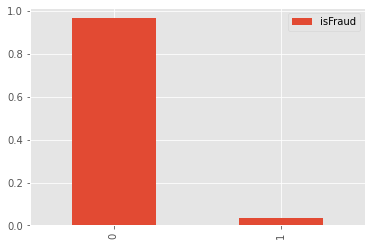

In [ ]:
fc = train_transaction['isFraud'].value_counts(normalize=True).to_frame()
fc.plot.bar()
fc.T

In dataset only 3.5% data is cheating --> data is unbalanced data

**Fraud rate is much less than Non Fraud**

In [ ]:
train_test = pd.concat([df], ignore_index=True)
train_test

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import datetime
import pandas as pd
START_DATE = '2019-01-01'
startdate = datetime.datetime.strptime(START_DATE, '%Y-%m-%d')
train_transaction['TransactionDT']  = train_transaction['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))

<Figure size 2880x3240 with 0 Axes>

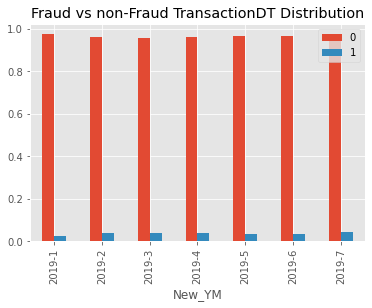

In [ ]:
train_transaction['New_YM'] = train_transaction['TransactionDT'].dt.year.astype(str) + '-' + train_transaction['TransactionDT'].dt.month.astype(str) 
plt.figure(figsize= [40,45])
train_transaction.groupby('New_YM').isFraud.value_counts(normalize = True).unstack().plot(kind = 'bar')
plt.title('Fraud vs non-Fraud TransactionDT Distribution')
plt.legend()


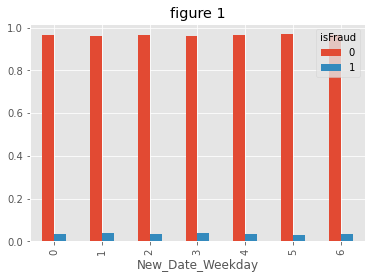

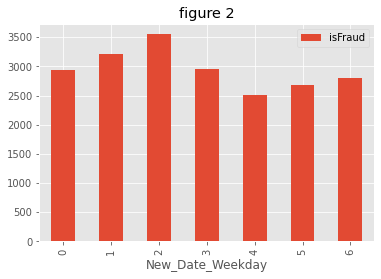

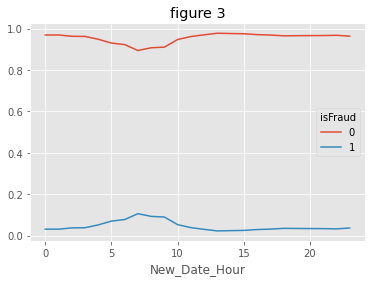

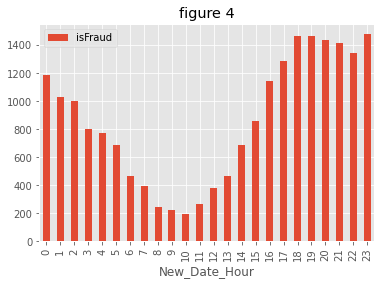

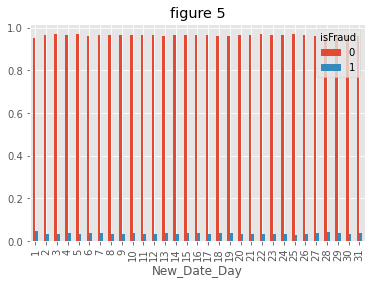

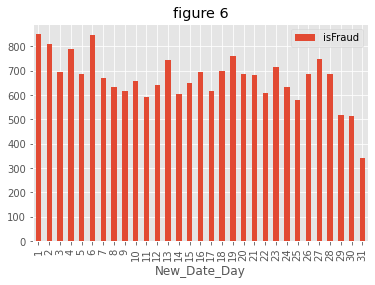

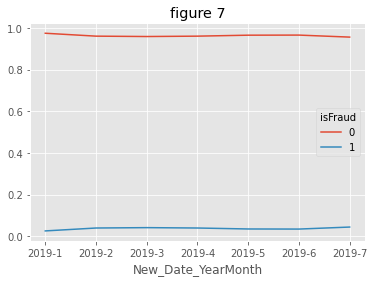

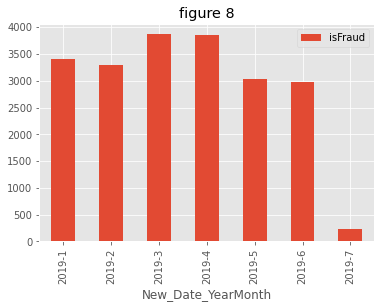

In [ ]:
START_DATE = '2019-01-01'
startdate = datetime.datetime.strptime(START_DATE, "%Y-%m-%d")

train_test['New_Date'] = train_test['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds=x)))
train_test['New_Date_YearMonth'] = train_test['New_Date'].dt.year.astype(str) + '-' + train_test['New_Date'].dt.month.astype(str)
train_test['New_Date_Weekday'] = train_test['New_Date'].dt.dayofweek
train_test['New_Date_Hour'] = train_test['New_Date'].dt.hour
train_test['New_Date_Day'] = train_test['New_Date'].dt.day


train_test.groupby('New_Date_Weekday').isFraud.value_counts(normalize = True).unstack().plot(kind='bar')
plt.title("figure 1")
train_test.groupby('New_Date_Weekday')['isFraud'].sum().to_frame().plot(kind = 'bar')
plt.title("figure 2")

train_test.groupby('New_Date_Hour').isFraud.value_counts(normalize = True).unstack().plot()
plt.title("figure 3")
train_test.groupby('New_Date_Hour')['isFraud'].sum().to_frame().plot(kind ='bar')
plt.title("figure 4")


train_test.groupby('New_Date_Day').isFraud.value_counts(normalize = True).unstack().plot(kind = 'bar')
plt.title("figure 5")
train_test.groupby('New_Date_Day')['isFraud'].sum().to_frame().plot(kind = 'bar')
plt.title("figure 6")

train_test.groupby('New_Date_YearMonth').isFraud.value_counts(normalize = True).unstack().plot()
plt.title("figure 7")
train_test.groupby('New_Date_YearMonth')['isFraud'].sum().to_frame().plot(kind = 'bar')
plt.title('figure 8')

plt.show()

Since the starting date is selected from January 1, 2019, the following comments are made:
- The time when fraud occurs most by day of the week is at the beginning of the week (Tuesday: more than 3.5%)
- Figure 3+5 : + Fraud rate rarely occurs at (7am, 10am)
              - + high rate of fraud at night (20h, 23h)
- occurs a lot on the first day of the month (the 1st day: about more than 4%) and the 6th day of the month
- Figure 7: Fruad and Non-fraud have similarities
most occurred in March and April 2019. July has the lowest fraud rate

# 2.Các giao dịch fraud xảy ra nhiều ở loại thiết bị nào ? 


**Device Type**

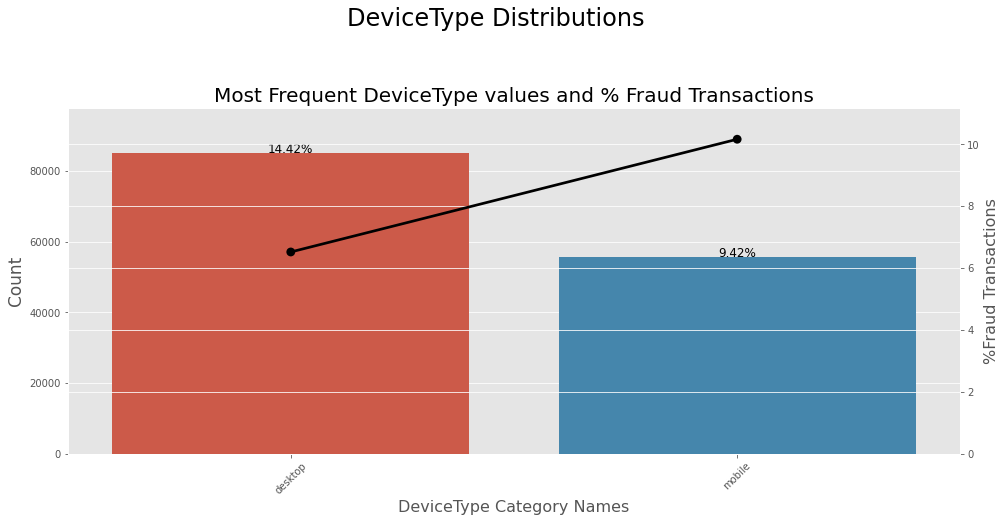

In [ ]:
ploting_cnt_amt(df, 'DeviceType')

In [ ]:
#fill NaN bằng unknown
train_identity['DeviceType'] = train_identity['DeviceType'].replace('unknown', np.nan)
train_identity['DeviceType']=train_identity['DeviceType'].fillna(train_identity['DeviceType'].mode().iloc[0])
train_identity['DeviceType']

0          mobile
1          mobile
2         desktop
3         desktop
4         desktop
           ...   
144228     mobile
144229     mobile
144230     mobile
144231    desktop
144232     mobile
Name: DeviceType, Length: 144233, dtype: object

Although desktop has a larger number, **fraud transactions happen more in mobile** (more than 10% of Fraud transactions)

Fill NaN bằng unknown

In [ ]:
#fill NaN with unknown
train_identity['DeviceType'] = train_identity['DeviceType'].replace('unknown', np.nan)
train_identity['DeviceType']=train_identity['DeviceType'].fillna(train_identity['DeviceType'].mode().iloc[0])
train_identity['DeviceType']

0          mobile
1          mobile
2         desktop
3         desktop
4         desktop
           ...   
144228     mobile
144229     mobile
144230     mobile
144231    desktop
144232     mobile
Name: DeviceType, Length: 144233, dtype: object

**Device Info**

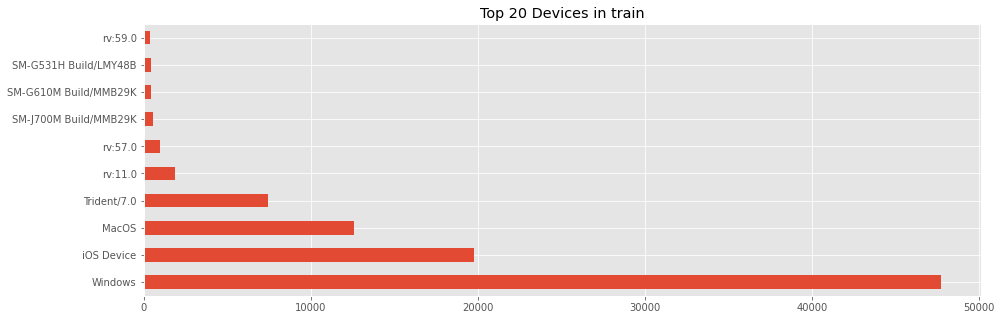

In [ ]:
df['DeviceInfo'].value_counts().head(10).plot(kind='barh', figsize=(15, 5), title='Top 20 Devices in train')
plt.show()


- Most used Windows operating system
- the same column is combined from different sources because the values ​​are different in nature. The original example is about the "DeviceInfo" column, which sometimes contains the device (LG-H840 Build / NRD90U) and sometimes the operating system (Android 7.1.2)
→ Parse is broken. The DeviceInfo feature can be parsed from the user agent string. That's why the value can be different things like OS version, device model or other user agent fragments


In [ ]:
train_test = pd.concat([df], ignore_index=True)

In [ ]:
train_test

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_test['DeviceInfo'] = train_test['DeviceInfo'].fillna('unknown_device').str.lower()
train_test['DeviceName'] = train_test['DeviceInfo'].str.split('/', expand=True)[0]

train_test.loc[train_test['DeviceName'].str.contains('SM', na=False), 'DeviceName'] = 'samsung'
train_test.loc[train_test['DeviceName'].str.contains('SAMSUNG', na=False), 'DeviceName'] = 'samsung'
train_test.loc[train_test['DeviceName'].str.contains('GT-', na=False), 'DeviceName'] = 'samsung'
train_test.loc[train_test['DeviceName'].str.contains('Moto G', na=False), 'DeviceName'] = 'motorola'
train_test.loc[train_test['DeviceName'].str.contains('Moto', na=False), 'DeviceName'] = 'motorola'
train_test.loc[train_test['DeviceName'].str.contains('moto', na=False), 'DeviceName'] = 'motorola'
train_test.loc[train_test['DeviceName'].str.contains('LG-', na=False), 'DeviceName'] = 'lg'
train_test.loc[train_test['DeviceName'].str.contains('rv:', na=False), 'DeviceName'] = 'rv'
train_test.loc[train_test['DeviceName'].str.contains('HUAWEI', na=False), 'DeviceName'] = 'huawei'
train_test.loc[train_test['DeviceName'].str.contains('ALE-', na=False), 'DeviceName'] = 'huawei'
train_test.loc[train_test['DeviceName'].str.contains('-L', na=False), 'DeviceName'] = 'huawei'
train_test.loc[train_test['DeviceName'].str.contains('Blade', na=False), 'DeviceName'] = 'zte'
train_test.loc[train_test['DeviceName'].str.contains('BLADE', na=False), 'DeviceName'] = 'zte'
train_test.loc[train_test['DeviceName'].str.contains('Linux', na=False), 'DeviceName'] = 'linux'
train_test.loc[train_test['DeviceName'].str.contains('XT', na=False), 'DeviceName'] = 'sony'
train_test.loc[train_test['DeviceName'].str.contains('HTC', na=False), 'DeviceName'] = 'htv'
train_test.loc[train_test['DeviceName'].str.contains('ASUS', na=False), 'DeviceName'] = 'asus'

train_test.loc[train_test['DeviceName'].isin(train_test['DeviceName'].value_counts()[train_test['DeviceName'].value_counts() < 1000].index), 'DeviceName'] = "Others"

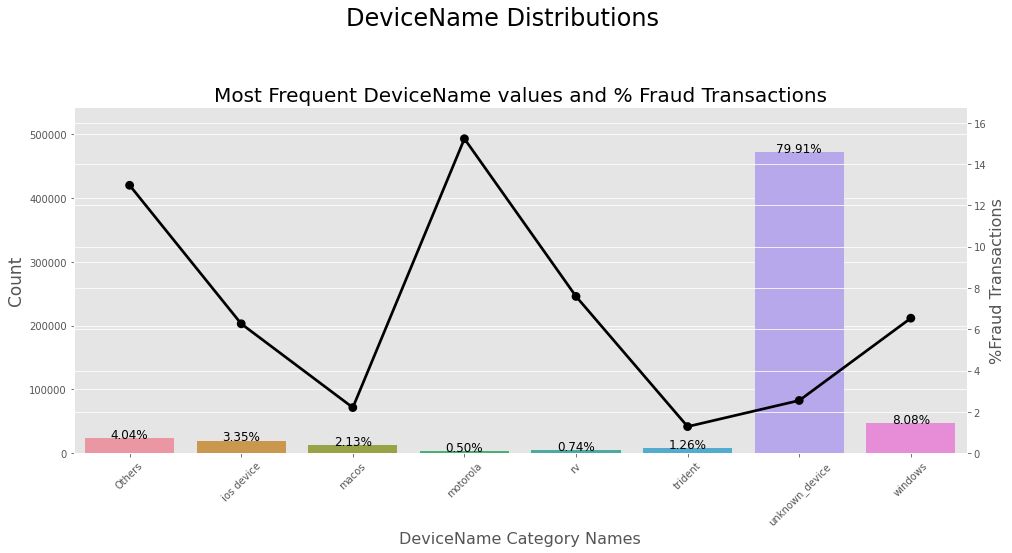

In [ ]:
ploting_cnt_amt(train_test, 'DeviceName')

-Looking at the graph, you will see that the two most used devices are Windows and IOS devices, but the most Frauds are done on 'Motorola' devices (about 15% of Fraud transactions)
- Because the data is corrupted, only Motorola devices have the most Frauds, and only which operating systems have more Frauds can be compared.
- Encoding :
'unknown_device':0
'windows': 1
'ios device': 2
'macos': 3
'Others':4
'trident' :5
'rv':6
'motorola': 7

# 3.Giao dịch fraud có tập trung ở 1 nước nào cụ thể không hay trải đều ở các vùng

In [ ]:
#  315-87: 100data , 325-87: 50 data 
add_features = ['addr1', 'addr2']

In [ ]:
add_fraud = train_transaction[train_transaction['isFraud'] == 1][add_features]
add_fraud.head()

,addr1,addr2
203,251.0,87.0
240,NaN,NaN
243,NaN,NaN
245,NaN,NaN
288,NaN,NaN


In [ ]:
add_fraud['add_adr'] = add_fraud['addr1'].astype(str) + add_fraud['addr2'].astype(str)
distance = ['addr1','addr2']
add_fraud['add_adr']

203       251.087.0
240          nannan
243          nannan
245          nannan
288          nannan
            ...    
590361    191.087.0
590364       nannan
590368    299.087.0
590372    272.087.0
590526    272.087.0
Name: add_adr, Length: 20663, dtype: object

In [ ]:
add_fraud['add_adr'].value_counts().head(10)

nannan       7741
204.087.0    1120
325.087.0    1087
299.087.0     985
330.087.0     840
264.087.0     728
272.087.0     576
441.087.0     533
337.087.0     439
315.087.0     411
Name: add_adr, dtype: int64

In [ ]:
sum = len(add_fraud )

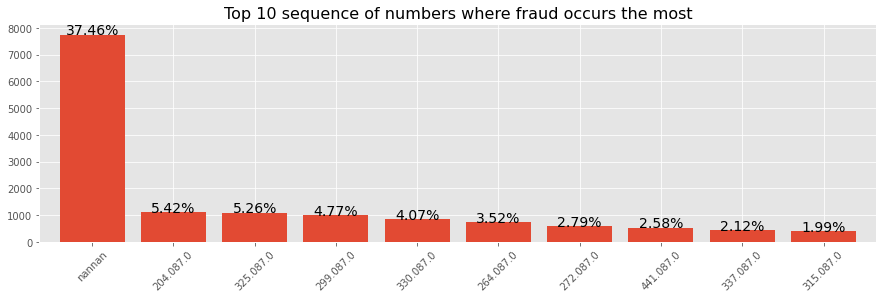

In [ ]:
ax = add_fraud['add_adr'].value_counts()[:10].plot(kind='bar', figsize=(15,4), width=0.8, edgecolor=None)
plt.title("Top 10 sequence of numbers where fraud occurs the most",fontsize= 16)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/sum*100),
            ha="center",fontsize=14)
plt.xticks(rotation= 45)
plt.show()

From the chart above, we see that region 204 of the country with code 87 has the highest rate of fraud (5.42%%) in transactions recorded as fraud and the lowest area of ​​the top 10 is 315 of the country with the code 87. code is 87(1.99%) down 1.2% compared to the sequence with the highest fraud rate.

In [ ]:
distance = ['addr1','addr2']
train_transaction[distance]

,addr1,addr2
0,315.0,87.0
1,325.0,87.0
2,330.0,87.0
3,476.0,87.0
4,420.0,87.0
...,...,...
590535,272.0,87.0
590536,204.0,87.0
590537,231.0,87.0
590538,387.0,87.0


In [ ]:
a = descrip_series(train_transaction, 'addr1')
a.head(n= 10)

,addr1,percent_in_column
299.0,46335,8.828506
325.0,42751,8.145623
204.0,42020,8.006341
264.0,39870,7.596688
330.0,26287,5.008631
315.0,23078,4.397200
441.0,20827,3.968302
272.0,20141,3.837594
123.0,16105,3.068589
126.0,15243,2.904347


In [ ]:
b = descrip_series(train_transaction, 'addr2')
b
# because the data that accounts for 99.17% is the data that contains 87 - USA
# so encoding 87 is US and remaining 73 lines are other countries.

,addr2,percent_in_column
87.0,520481,99.170595
60.0,3084,0.587614
96.0,638,0.121562
32.0,91,0.017339
65.0,82,0.015624
...,...,...
49.0,1,0.000191
14.0,1,0.000191
25.0,1,0.000191
22.0,1,0.000191


These features are categorical even if they look numerical
Ex: 87 is the US area code

In [ ]:

train_transaction['addr1'].value_counts().head(10)

299.0    46335
325.0    42751
204.0    42020
264.0    39870
330.0    26287
315.0    23078
441.0    20827
272.0    20141
123.0    16105
126.0    15243
Name: addr1, dtype: int64

In [ ]:
train_transaction['addr1'].value_counts().head(10)

299.0    46335
325.0    42751
204.0    42020
264.0    39870
330.0    26287
315.0    23078
441.0    20827
272.0    20141
123.0    16105
126.0    15243
Name: addr1, dtype: int64

In [ ]:
train_transaction.loc[train_transaction['addr1'].isin(train_transaction['addr1'].value_counts()[train_transaction['addr1'].value_counts() <= 5000 ].index), 'addr1'] = "Others"
train_transaction.loc[train_transaction['addr2'].isin(train_transaction['addr2'].value_counts()[train_transaction['addr2'].value_counts() <= 50 ].index), 'addr2'] = "Others"


train_transaction['addr1'].fillna("NoInf", inplace=True)


train_transaction['addr2'].fillna("NoInf", inplace=True)


Fill NaN : No Inf

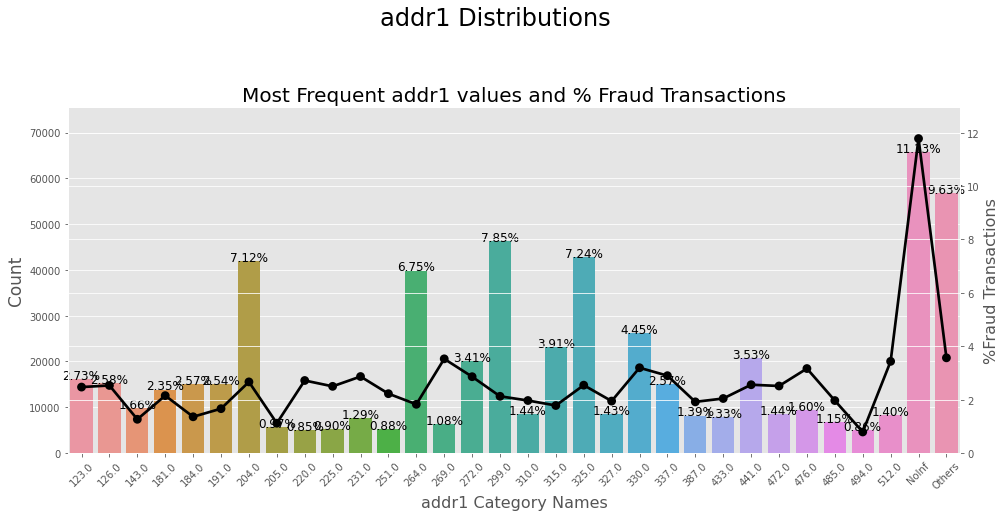

In [ ]:
ploting_cnt_amt(train_transaction, "addr1")

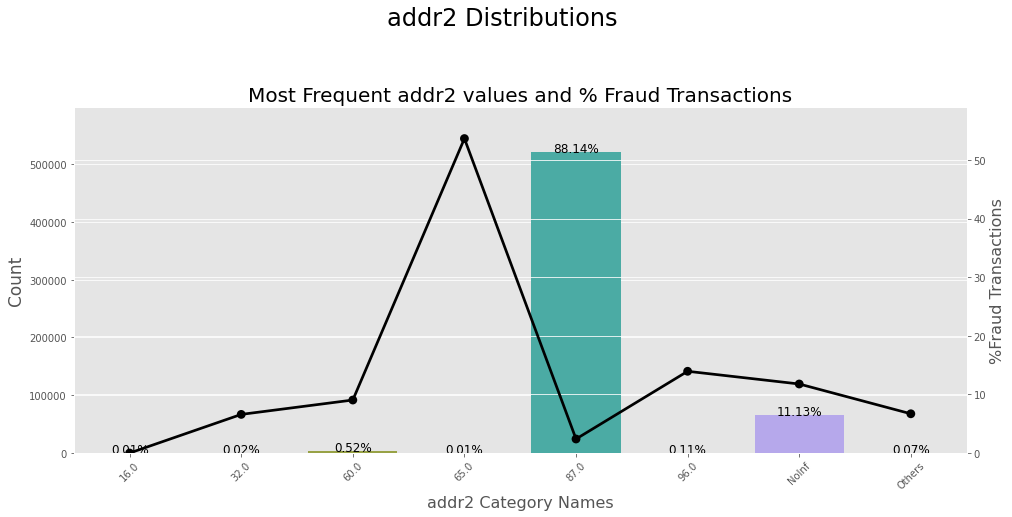

In [ ]:
ploting_cnt_amt(train_transaction, "addr2")

Looking at the chart, we see that the area with the most Fraud transactions with the area code of 65 is Singapore, although the number is very small (over 50% of Fraud transactions).

- Looking at add1 will see that Fraud transactions are not concentrated in one area but spread in many areas

- In add2 Fraud transactions happen a lot in Singapore (over 50%) even though the data has up to 99.17% of US data.

# 4.Loại thẻ nào thì giao dịch fraud xảy ra nhiều nhất 

In [ ]:
cardd4=

In [ ]:
cardd4 = train_transaction[train_transaction['isFraud'] == 1][cardd4]
cardd4.head()

NameError: ignored

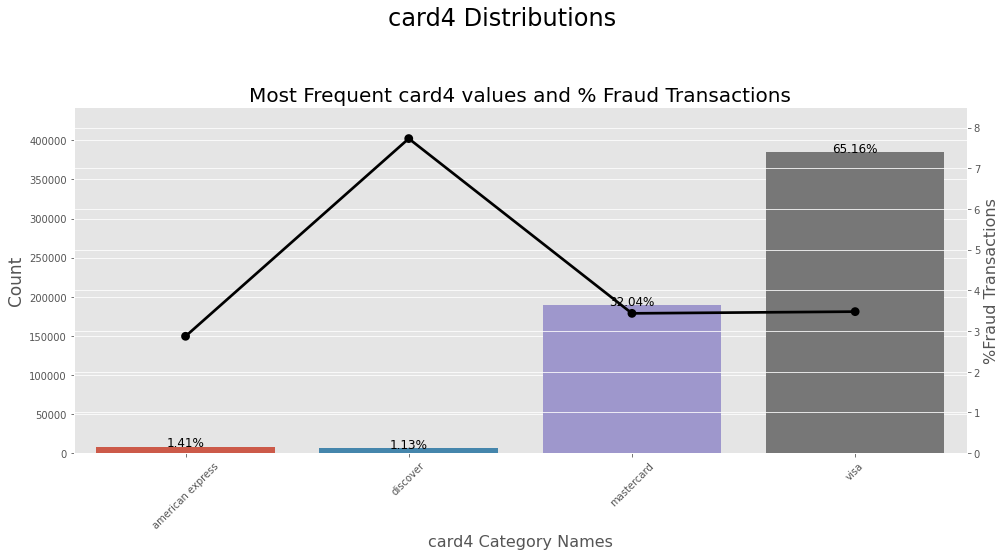

In [ ]:
ploting_cnt_amt(train_transaction, 'card4')

Looking at the chart, we see that with Visa cards, the data accounts for 65%, but the card with the most fraud is discover (accounting for nearly 8% of Fraud rate) even though the data is only 1.13%.

Discover card is a card issued by Discover Financial Corporation in the US. Functions are the same as cards of other brands such as Visa, AMX, Mastercard. Because it's less common than Visa or Mastercard, it's easier for bad guys to cheat, or another case is when the Discovery card is lost, crooks can easily use the card number (Pin code) on the card. old card to make a payment card identical to the original card (two cards can be paid in parallel).

# 5.Các giao dịch fraud thường xảy ra ở ProductCD nào 

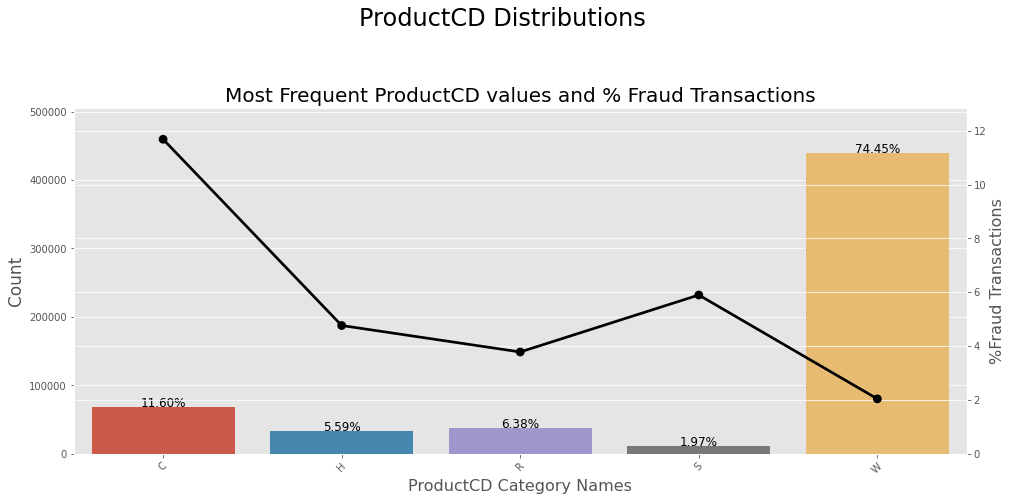

In [ ]:
ploting_cnt_amt(train_transaction, 'ProductCD')

Looking at the graph we see that W, C and R are the most frequent values ​​with 74.45%, 11.6% and 6.38%. However, Fraud transactions occur most at value C with Fraud rate of nearly 12%.

# 6.Thống kê những email fraud -> nêu nhận xét

In [ ]:
train_transaction.loc[train_transaction['P_emaildomain'].isin(['gmail.com', 'gmail']),'P_emaildomain'] = 'Google'

train_transaction.loc[train_transaction['P_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk',
                                         'yahoo.co.jp', 'yahoo.de', 'yahoo.fr',
                                         'yahoo.es']), 'P_emaildomain'] = 'Yahoo Mail'
train_transaction.loc[train_transaction['P_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 
                                         'hotmail.es','hotmail.co.uk', 'hotmail.de',
                                         'outlook.es', 'live.com', 'live.fr',
                                         'hotmail.fr']), 'P_emaildomain'] = 'Microsoft'
train_transaction.loc[train_transaction.P_emaildomain.isin(train_transaction.P_emaildomain\
                                         .value_counts()[train_transaction.P_emaildomain.value_counts() <= 500 ]\
                                         .index), 'P_emaildomain'] = "Others"
train_transaction.P_emaildomain.fillna("unknown", inplace=True)

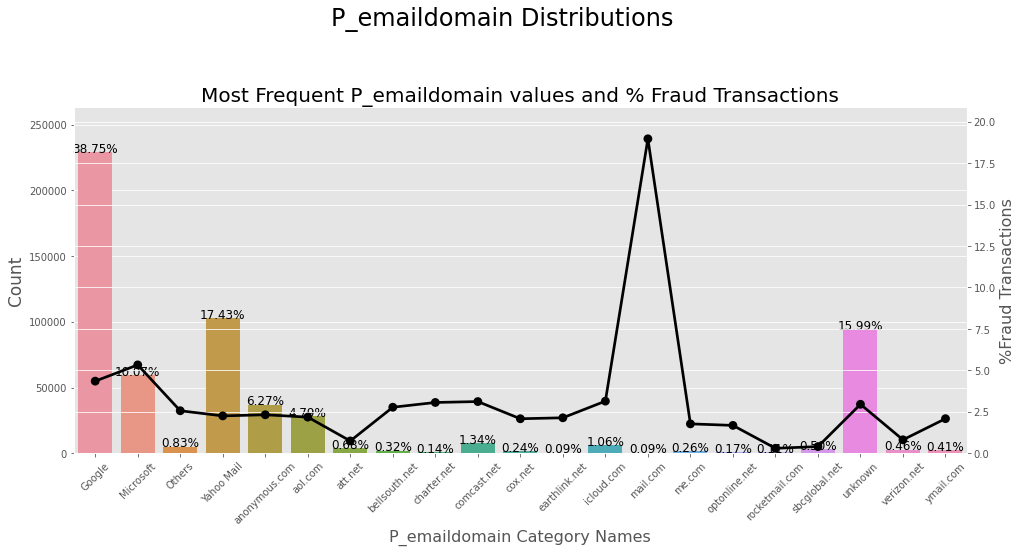

In [ ]:
ploting_cnt_amt(train_transaction, 'P_emaildomain')

Looking at the chart above, we see that mail.com has the highest percentage of Fraud (accounting for nearly 20% of Fraud rate although in the data it only accounts for 0.09%), then Microsoft (accounting for over 5%) and google (accounting for nearly 5%)

In [ ]:
train_transaction.loc[train_transaction['R_emaildomain'].isin(['gmail.com', 'gmail']),'R_emaildomain'] = 'Google'

train_transaction.loc[train_transaction['R_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk',
                                             'yahoo.co.jp', 'yahoo.de', 'yahoo.fr',
                                             'yahoo.es']), 'R_emaildomain'] = 'Yahoo Mail'
train_transaction.loc[train_transaction['R_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 
                                             'hotmail.es','hotmail.co.uk', 'hotmail.de',
                                             'outlook.es', 'live.com', 'live.fr',
                                             'hotmail.fr']), 'R_emaildomain'] = 'Microsoft'
train_transaction.loc[train_transaction.R_emaildomain.isin(train_transaction.R_emaildomain\
                                         .value_counts()[train_transaction.R_emaildomain.value_counts() <= 300 ]\
                                         .index), 'R_emaildomain'] = "Others"
train_transaction.R_emaildomain.fillna("NoInf", inplace=True)

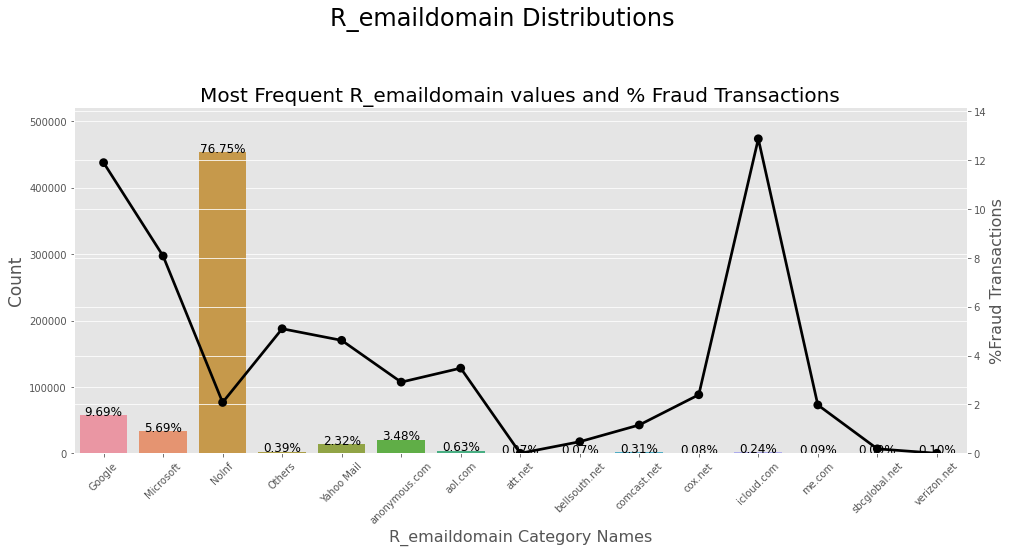

In [ ]:
ploting_cnt_amt(train_transaction, 'R_emaildomain')

Looking at the chart, we see that icloud.com has the highest percentage (accounting for nearly 14% of Fraud rate although in the data it only accounts for 0.24%), then google (accounting for nearly 12%) and Microsoft (accounting for more than 8%)

From the above 2 email domain charts, we can cheat or happen on emails: google, microsoft, mail.com and icloud.

# 7.Kiểu thẻ có mã số như thế nào có thể xem xét là gian lận ?

In [ ]:
train_transaction.loc[train_transaction.card3.isin(train_transaction.card3.value_counts()[train_transaction.card3.value_counts() < 200].index), 'card3'] = "Others"
train_transaction.loc[train_transaction.card5.isin(train_transaction.card5.value_counts()[train_transaction.card5.value_counts() < 300].index), 'card5'] = "Others"

Card 1, card 2, card 3, card 5

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

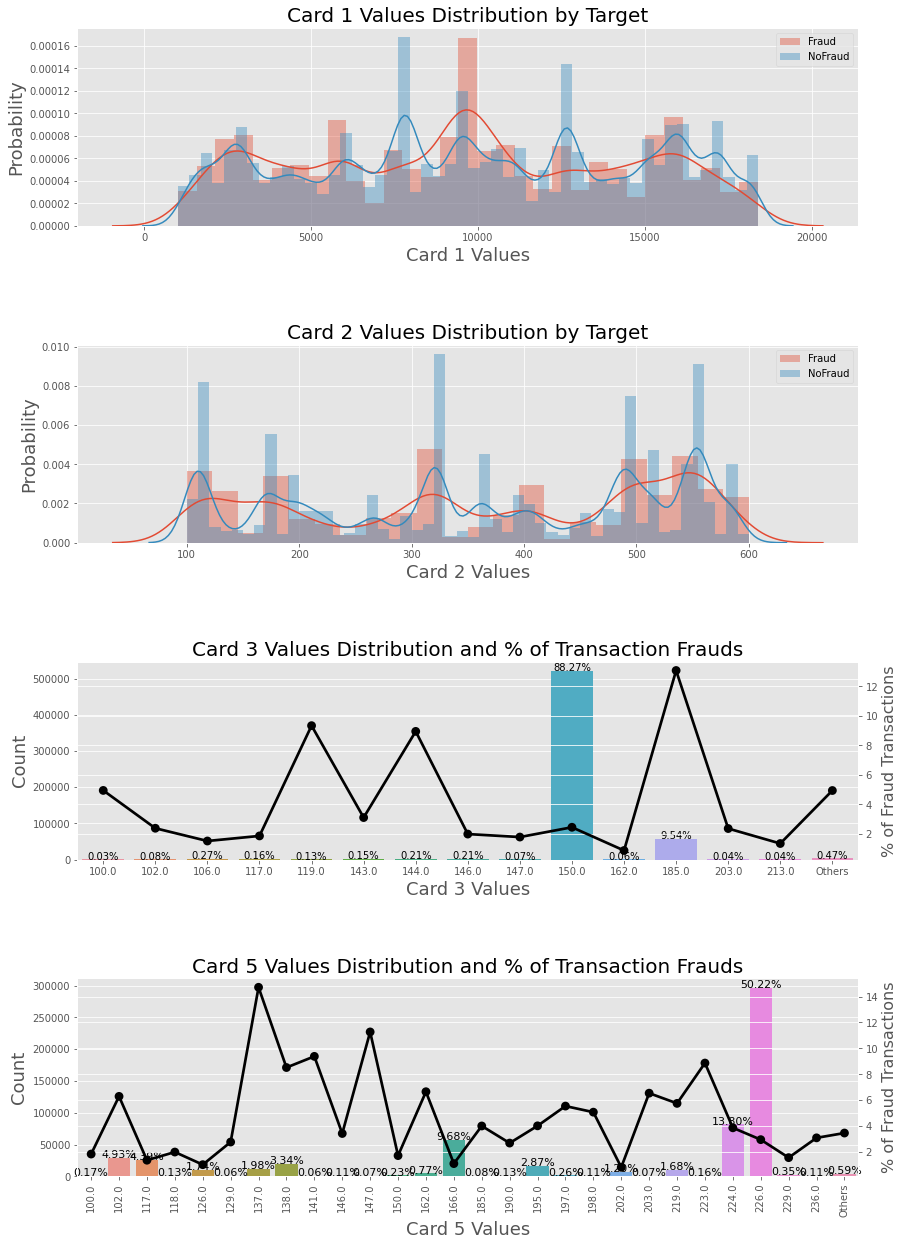

In [ ]:
tmp = pd.crosstab(train_transaction['card3'], train_transaction['isFraud'], normalize='index') * 100
tmp = tmp.reset_index()
tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)

tmp2 = pd.crosstab(train_transaction['card5'], train_transaction['isFraud'], normalize='index') * 100
tmp2 = tmp2.reset_index()
tmp2.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)

plt.figure(figsize=(14,22))

plt.subplot(411)
g = sns.distplot(train_transaction[train_transaction['isFraud'] == 1]['card1'], label='Fraud')
g = sns.distplot(train_transaction[train_transaction['isFraud'] == 0]['card1'], label='NoFraud')
g.legend()
g.set_title("Card 1 Values Distribution by Target", fontsize=20)
g.set_xlabel("Card 1 Values", fontsize=18)
g.set_ylabel("Probability", fontsize=18)

plt.subplot(412)
g1 = sns.distplot(train_transaction[train_transaction['isFraud'] == 1]['card2'].dropna(), label='Fraud')
g1 = sns.distplot(train_transaction[train_transaction['isFraud'] == 0]['card2'].dropna(), label='NoFraud')
g1.legend()
g1.set_title("Card 2 Values Distribution by Target", fontsize=20)
g1.set_xlabel("Card 2 Values", fontsize=18)
g1.set_ylabel("Probability", fontsize=18)
plt.subplot(413)
g2 = sns.countplot(x='card3', data=train_transaction, order=list(tmp.card3.values))
g22 = g2.twinx()
gg2 = sns.pointplot(x='card3', y='Fraud', data=tmp, 
                    color='black', order=list(tmp.card3.values))
gg2.set_ylabel("% of Fraud Transactions", fontsize=16)
g2.set_title("Card 3 Values Distribution and % of Transaction Frauds", fontsize=20)
g2.set_xlabel("Card 3 Values", fontsize=18)
g2.set_ylabel("Count", fontsize=18)
total = len(train_transaction)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2.,
            height + 25,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 

plt.subplot(414)
g3 = sns.countplot(x='card5', data=train_transaction, order=list(tmp2.card5.values))
g3t = g3.twinx()
g3t = sns.pointplot(x='card5', y='Fraud', data=tmp2, 
                    color='black', order=list(tmp2.card5.values))
g3t.set_ylabel("% of Fraud Transactions", fontsize=16)
g3.set_title("Card 5 Values Distribution and % of Transaction Frauds", fontsize=20)
g3.set_xticklabels(g3.get_xticklabels(),rotation=90)
g3.set_xlabel("Card 5 Values", fontsize=18)
g3.set_ylabel("Count", fontsize=18)
for p in g3.patches:
    height = p.get_height()
    g3.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center",fontsize=11) 
    
plt.subplots_adjust(hspace = 0.6, top = 0.85)


plt.show()


- In Card 3, we can see that 150(88.27%) and 185(9.54%) are the most common values ​​in the column. The values ​​with the highest fraud transactions are 185( ~14%), 119( ~10%) and 144( ~9.5%).

- In Card 5, the most common values ​​are 226, 224, 166, representing 73% of the data. But we see a high rate of fraud at 137, 147, 141 even though these are values ​​that appear infrequently.

Card 4 - Categorical

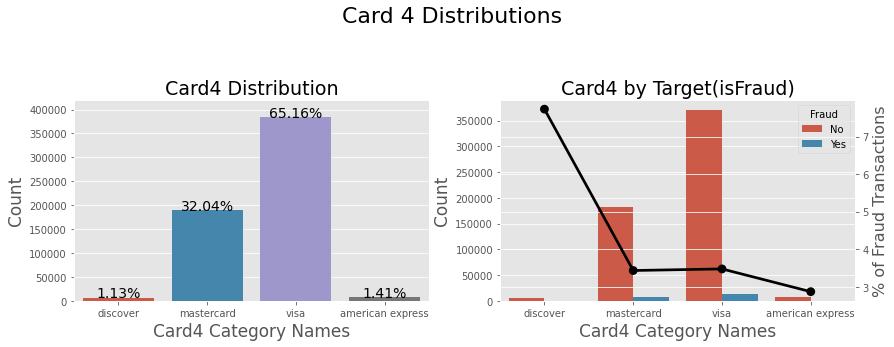

In [ ]:
tmp = pd.crosstab(train_transaction['card4'], train_transaction['isFraud'], normalize='index') * 100
tmp = tmp.reset_index()
tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)

plt.figure(figsize=(14,10))
plt.suptitle('Card 4 Distributions', fontsize=22)

plt.subplot(221)
g = sns.countplot(x='card4', data=train_transaction)
# plt.legend(title='Fraud', loc='upper center', labels=['No', 'Yes'])
g.set_title("Card4 Distribution", fontsize=19)
g.set_ylim(0,420000)
g.set_xlabel("Card4 Category Names", fontsize=17)
g.set_ylabel("Count", fontsize=17)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center",fontsize=14) 


plt.subplot(222)
g1 = sns.countplot(x='card4', hue='isFraud', data=train_transaction)
plt.legend(title='Fraud', loc='best', labels=['No', 'Yes'])
gt = g1.twinx()
gt = sns.pointplot(x='card4', y='Fraud', data=tmp, 
                   color='black', legend=False, 
                   order=['discover', 'mastercard', 'visa', 'american express'])
gt.set_ylabel("% of Fraud Transactions", fontsize=16)
g1.set_title("Card4 by Target(isFraud)", fontsize=19)
g1.set_xlabel("Card4 Category Names", fontsize=17)
g1.set_ylabel("Count", fontsize=17)

plt.subplots_adjust(hspace = 0.6, top = 0.85)

plt.show()

In [ ]:
a_1 = df[['card4','isFraud']][df['isFraud'] == 1]
a_1 = a_1.groupby('card4').agg({'isFraud': sum})
a_0 = df[['card4','isFraud']][df['isFraud'] == 0]
a_0 = a_0.groupby('card4').agg({'isFraud': 'count'})
a_0.columns = ['isFraud_0']
a_0['isFraud_1'] = a_1['isFraud']
a_0['percent'] = round((a_0['isFraud_1'] / a_0['isFraud_0']) * 100,2)
a_0['percent_fraud'] =round((a_0['isFraud_1'] /sum(a_0['isFraud_1'])) * 100,2)
a_0


,isFraud_0,isFraud_1,percent,percent_fraud
card4,,,,
american express,8089,239,2.95,1.16
discover,6137,514,8.38,2.49
mastercard,182721,6496,3.56,31.50
visa,371394,13373,3.60,64.85


We can see that 97% of the data is in Mastercard (32.04%) and Visa~ (65.16%). The highest value of fraud is Discover(~8%) compared to (~3.5%) in Mastercard and Visa and (~3%) in American Express

Card 6 - Categorical

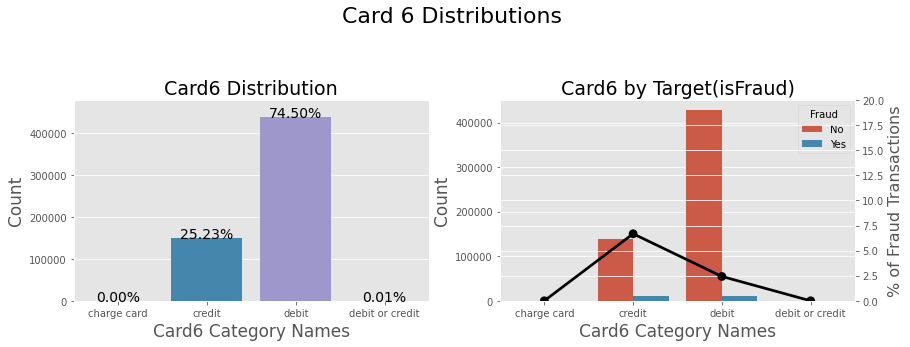

In [ ]:
tmp = pd.crosstab(train_transaction['card6'], train_transaction['isFraud'], normalize='index') * 100
tmp = tmp.reset_index()
tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)

plt.figure(figsize=(14,10))
plt.suptitle('Card 6 Distributions', fontsize=22)

plt.subplot(221)
g = sns.countplot(x='card6', data=train_transaction, order=list(tmp.card6.values))
# plt.legend(title='Fraud', loc='upper center', labels=['No', 'Yes'])
g.set_title("Card6 Distribution", fontsize=19)
g.set_ylim(0,480000)
g.set_xlabel("Card6 Category Names", fontsize=17)
g.set_ylabel("Count", fontsize=17)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center",fontsize=14) 

plt.subplot(222)
g1 = sns.countplot(x='card6', hue='isFraud', data=train_transaction, order=list(tmp.card6.values))
plt.legend(title='Fraud', loc='best', labels=['No', 'Yes'])
gt = g1.twinx()
gt = sns.pointplot(x='card6', y='Fraud', data=tmp, order=list(tmp.card6.values),
                   color='black', legend=False, )
gt.set_ylim(0,20)
gt.set_ylabel("% of Fraud Transactions", fontsize=16)
g1.set_title("Card6 by Target(isFraud)", fontsize=19)
g1.set_xlabel("Card6 Category Names", fontsize=17)
g1.set_ylabel("Count", fontsize=17)

plt.subplots_adjust(hspace = 0.6, top = 0.85)

plt.show()

we can see all the data is credit(25.23%) and debit(74.50%). Besides, the fraud rate of credit(~7.5%), is higher than debit(2.5%)

In [ ]:
b_1 = df[['card6','isFraud']][df['isFraud'] == 1]
b_1 = b_1.groupby('card6').agg({'isFraud': sum})
b_0 = df[['card6','isFraud']][df['isFraud'] == 0]
b_0 = b_0.groupby('card6').agg({'isFraud': 'count'})
b_0.columns = ['isFraud_0']
b_0['isFraud_1'] = b_1['isFraud']
b_0['percent'] = (b_0['isFraud_1'] / b_0['isFraud_0']) * 100
b_0

,isFraud_0,isFraud_1,percent
card6,,,
charge card,15,NaN,NaN
credit,139036,9950.0,7.156420
debit,429264,10674.0,2.486582
debit or credit,30,NaN,NaN


In [ ]:
card_features = ['card1', 'card2', 'card3', 'card4', 'card5','card6']

In [ ]:
train_transaction[card_features].dtypes

card1      int64
card2    float64
card3     object
card4     object
card5     object
card6     object
dtype: object

In [ ]:
train_transaction['card1']= train_transaction['card1'].astype(str)
train_transaction['card2'] = train_transaction['card2'].astype(str)
train_transaction['card3'] = train_transaction['card3'].astype(str)
train_transaction['card5'] = train_transaction['card5'].astype(str)

In [ ]:
card_fraud = train_transaction[train_transaction['isFraud'] == 1][card_features]
card_fraud.head()

,card1,card2,card3,card4,card5,card6
203,18268,583.0,150.0,visa,226.0,credit
240,13413,103.0,185.0,visa,137.0,credit
243,13413,103.0,185.0,visa,137.0,credit
245,13413,103.0,185.0,visa,137.0,credit
288,16578,545.0,185.0,visa,226.0,credit


In [ ]:
card_fraud['concatenated_cards']=card_fraud.card1 + card_fraud.card2 + card_fraud.card3 + card_fraud.card5

In [ ]:
card_fraud['concatenated_cards'].value_counts().head(10)

9500321.0150.0226.0     527
9633130.0185.0138.0     465
15885545.0185.0138.0    442
9026545.0185.0137.0     396
5812408.0185.0224.0     314
15066170.0150.0102.0    313
9917142.0185.0138.0     305
6019583.0150.0226.0     294
3154408.0185.0224.0     286
17188321.0150.0226.0    278
Name: concatenated_cards, dtype: int64

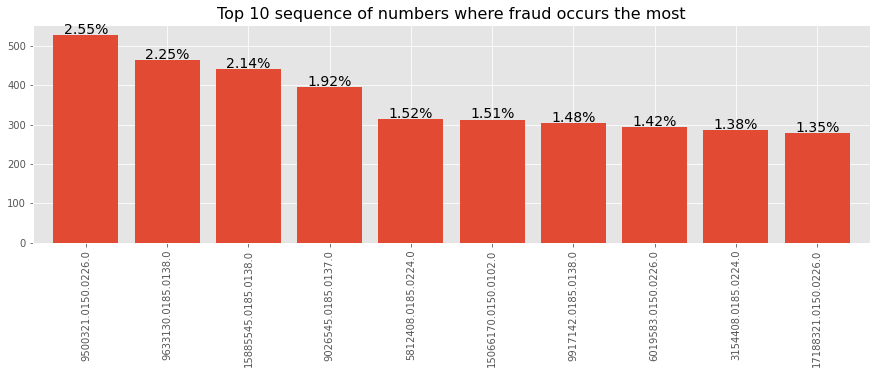

In [ ]:
ax = card_fraud['concatenated_cards'].value_counts()[:10].plot(kind='bar', figsize=(15,4), width=0.8, edgecolor=None)
plt.title("Top 10 sequence of numbers where fraud occurs the most",fontsize= 16)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/sum*100),
            ha="center",fontsize=14)
plt.show()

From the chart above, we see that the sequence 9500321.0150.0226.0 accounts for the highest fraud rate (2.55%) in the transactions recorded as fraud and the lowest sequence of the top 10 is 17188321.0150.0226.0(1, 35%) is 1.2% less than the series with the highest fraud rate.

# 8.Các gian lận thường xảy ra với mức tiền như thế nào ?


- TransactionAmt: The amount of the transaction.
- I apply log transform to better show the distribution of data. Otherwise, very large transactions will skew the distribution.
Because of the log transfrom, any values ​​between 0 and 1 will appear to be negative.


In [ ]:
train_fraud = df.loc[df['isFraud'] == 1]
train_non_fraud = df.loc[df['isFraud'] == 0]

df['isFraud'].value_counts(normalize=True)

0    0.96501
1    0.03499
Name: isFraud, dtype: float64

In [ ]:
print(pd.concat([df['TransactionAmt'].quantile([.01, .1, .25, .5, .75, .9, .99]).reset_index(),
                 train_fraud['TransactionAmt'].quantile([.01, .1, .25, .5, .75, .9, .99]).reset_index(), 
                 train_non_fraud['TransactionAmt'].quantile([.01, .1, .25, .5, .75, .9, .99]).reset_index()],
                   axis=1, keys=['Total','Fraud', "No Fraud"]))

  Total                Fraud                No Fraud               
  index TransactionAmt index TransactionAmt    index TransactionAmt
0  0.01          9.244  0.01        6.74096     0.01        9.51288
1  0.10         25.950  0.10       18.93600     0.10       26.31000
2  0.25         43.321  0.25       35.04400     0.25       43.97000
3  0.50         68.769  0.50       75.00000     0.50       68.50000
4  0.75        125.000  0.75      161.00000     0.75      120.00000
5  0.90        275.293  0.90      335.00000     0.90      267.11200
6  0.99       1104.000  0.99      994.00000     0.99     1104.00000


In [ ]:
print(' Fraud TransactionAmt mean      :  '+str(train_fraud['TransactionAmt'].mean()))
print(' Non - Fraud TransactionAmt mean:  '+str(train_non_fraud['TransactionAmt'].mean()))

 Fraud TransactionAmt mean      :  149.2447785897534
 Non - Fraud TransactionAmt mean:  134.51166457896034


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


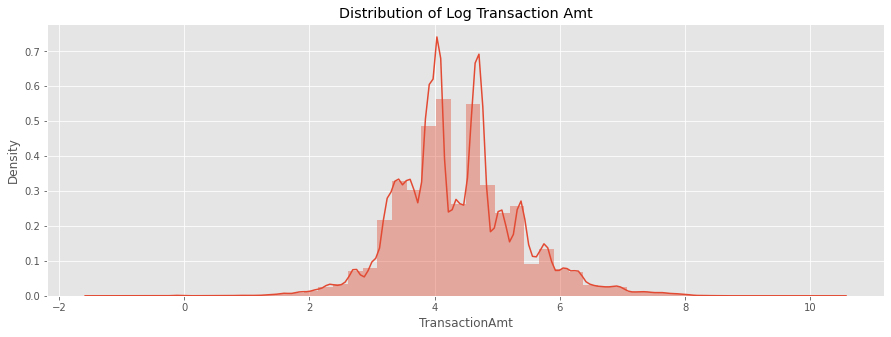

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(train_test["TransactionAmt"].apply(np.log))
plt.title('Distribution of Log Transaction Amt')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


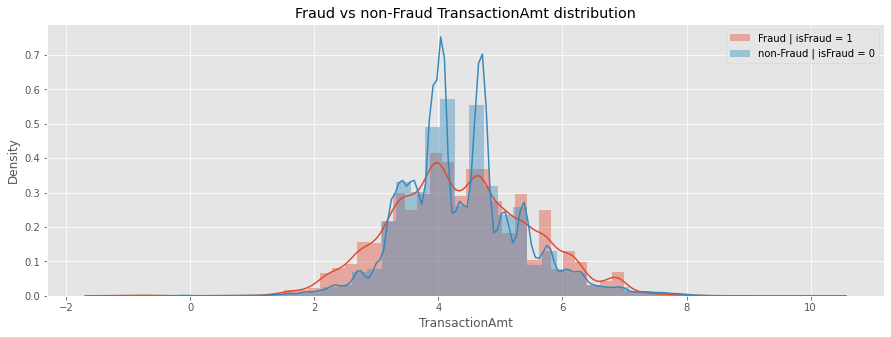

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(train_fraud["TransactionAmt"].apply(np.log), label = 'Fraud | isFraud = 1')
sns.distplot(train_non_fraud["TransactionAmt"].apply(np.log), label = 'non-Fraud | isFraud = 0')
plt.title('Fraud vs non-Fraud TransactionAmt distribution')
plt.legend()
plt.show()

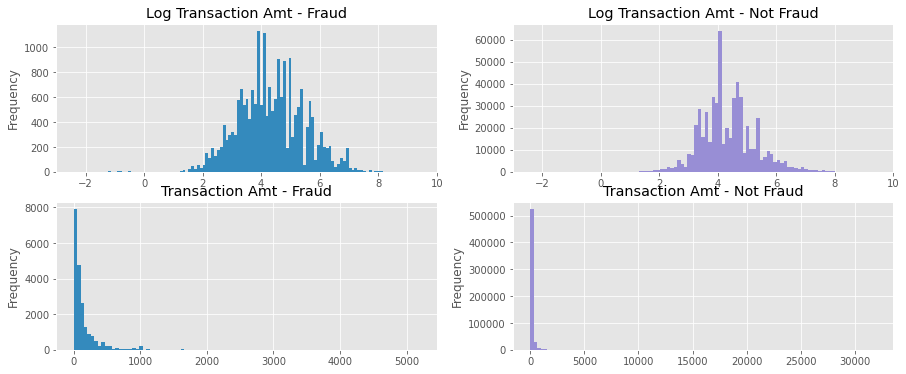

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 6))
train_transaction.loc[train_transaction['isFraud'] == 1] \
    ['TransactionAmt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Transaction Amt - Fraud',
          color=color_pal[1],
          xlim=(-3, 10),
         ax= ax1)
train_transaction.loc[train_transaction['isFraud'] == 0] \
    ['TransactionAmt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Transaction Amt - Not Fraud',
          color=color_pal[2],
          xlim=(-3, 10),
         ax=ax2)
train_transaction.loc[train_transaction['isFraud'] == 1] \
    ['TransactionAmt'] \
    .plot(kind='hist',
          bins=100,
          title='Transaction Amt - Fraud',
          color=color_pal[1],
         ax= ax3)
train_transaction.loc[train_transaction['isFraud'] == 0] \
    ['TransactionAmt'] \
    .plot(kind='hist',
          bins=100,
          title='Transaction Amt - Not Fraud',
          color=color_pal[2],
         ax=ax4)
plt.show()


Fraudulent fees seem to have higher average transaction amounts

- The average value of the fraudulent transaction amount is greater than the average value of the non-fraudulent transaction amount.
- In addition, the lowest and highest transaction amounts seem to be more likely to be fraudulent transactions.

TransactionAmt    5191.0
dtype: float64 TransactionAmt    0.292
dtype: float64


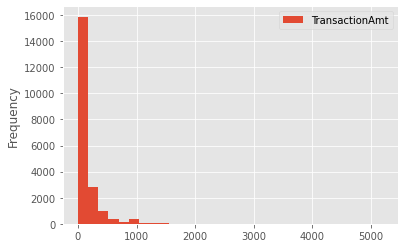

In [ ]:
a = df[df['isFraud'] == 1]
b = pd.DataFrame(a['TransactionAmt'])
print(b.max(), b.min())
b.plot(kind = 'hist', bins = 30)

In [ ]:
df['amount'] = pd.cut(df['TransactionAmt'], [0,1000,2000,3000],labels = ['0-1000','1000-2000','>3000'])

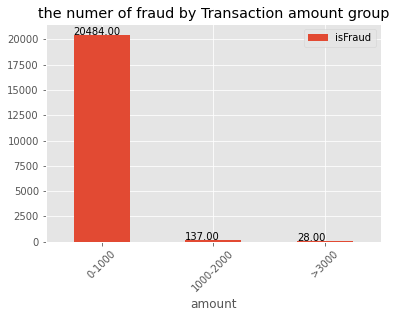

In [ ]:
amount_statis = df.groupby('amount').agg({'isFraud': sum})
ax = amount_statis.plot(kind = 'bar')
for p in ax.patches: 
  width, height = p.get_width(), p.get_height()
  x,y = p.get_xy()
  ax.annotate('{:.2f}'.format(height), (x, y + height+0.02))
plt.xticks(rotation = 45)
plt.title("the numer of fraud by Transaction amount group")
plt.show()

-  The maximum amount of fraud is 5191 

- The minimum amount of fraud is 0.292. 

According to the graph, the greatest number of fraudulent transactions occur exclusively in the range of 0.292 to less than 1000. 

The most fraudulent money happens at the 0 to 100 money level.

→ As a result, because fraudulent transactions occur often, it is vital to pay more attention to the money level ranging from 0 to 100.
